## Procesos de Fabricación Aeronáutica - Máster Universitario en Ingeniería Aeronáutica
### Problema de estampación, examen 13/12/2018

<img src="Fig4.2.png" alt="Stamping" width="400"/>

<img src="Fig4.3.png" alt="Stamping" width="600"/>

Mediante conformado de chapa por estirado se pretende realizar un componente como el mostrado en la figura pero con la pared BC vertical. La chapa es de AA2024-T3 de 1.2 mm de espesor. La ley de comportamiento del material viene dada por $\sigma_1 = 814.04 (0.025+\varepsilon_1)^{0.245} \text{ MPa}$. Las dimensiones del componente son: $a = 330$ mm, $c = 0$ (pared BC vertical), $R_F = 2800$ mm, $R_P = R_D = 10$ mm, BC = 28 mm, DE = 0 mm, EF = 80 mm y FG = 0 mm. Asumiendo hipótesis de deformación plana se pide:
1. Sabiendo que en un instante la deformación principal máxima en el punto O es de $\varepsilon_{1,\text{O}}=0.03$ y el coeficiente de fricción es $\mu = 0.1$, estimar la mínima fuerza $B$ del prensa-chapa.
2. Si en un determinado instante la chapa estuviese a punto de fallar, estimar la fuerza del punzón $F$ y la deformación en el punto O ($\varepsilon_{1,\text{O}}$).


### Notas

- El enunciado dice "estirado" pero se trata de un proceso de estampación. 
- En el enunciado se dice que $c = 0$  (pared BC vertical). Sin embargo, debe existir una holgura entre punzón y matriz de al menos el espesor de la chapa, $c \ge t_0 = 1.2$ mm. En cualquier caso, el valor de $c$ no es relevante para la resolución del problema.
- Se pide la "mínima" fuerza del prensa-chapa. En realidad, no hay una fuerza $B$ mínima ni máxima sino la que requiere el proceso para producir la pieza con la geometría dada y con la deformación especificada en el punto O.

### Solución

Los datos del problema son los siguientes:

In [1]:
import math

t0 = 1.2
K = 814.04
e0 = 0.025
n = 0.245
s1 = lambda e1: K*(e0+e1)**n    # comportamiento del material en función de e1
a = 330
c = 0
Rf = 2800
Rp = 10
Rd = 10
sBC = 28
sDE = 0
sEF = 80
sFG = 0
e1O = 0.03
mu = 0.1

El cálculo del espesor de la chapa y de la fuerza por unidad de longitud se pueden definir en función de la deformación como:
$$
\begin{aligned}
t = & t_0 \exp{(-\varepsilon_1)} \\
T_{1} = & {\sigma_{1} t} = K (\varepsilon_{1})^n \cdot t_0 \exp{(-\varepsilon_{1})}
\end{aligned}
$$

Otra ecuación que va a utilizarse es la fuerza en un extremo k de un tramo curvo, en el que la chapa se desliza con rozamiento, en función de la fuerza en el otro extremo j y del ángulo del tramo:
$$
T_{1,\text{k}} = T_{1,\text{j}} \exp{(\mu \, \theta_\text{jk})}
$$

In [2]:
# Defino funciones para esas 3 expresiones:
t = lambda e1: t0*math.exp(-e1)
T1 = lambda e1: s1(e1)*t(e1)
T1k = lambda T1j, theta: T1j*math.exp(mu*theta)

#### Fuerza $B$ del prensa-chapa

La fuerza del prensa-chapa es la necesaria para que se produzca la deformación del enunciado, $\varepsilon_{1O}=0.03$, cuando el punzón ha alcanzado la posición $h$. Aunque no es necesario calcularla, $h$ se obtiene sabiendo que al ser la pared BC vertical, los tramos AB y CD son de $90°$:
$$
h = (R_f - \sqrt{R_f^2 - a^2}) + R_p + s_\text{BC} + R_d
$$

In [3]:
h = Rf - math.sqrt(Rf**2 - a**2) + Rp + sBC + Rd
print('h = %.1f mm' % h)

h = 67.5 mm


La fuerza del prensa-chapa se obtiene entonces del equilibrio con la fuerza (por unidad de longitud) en el punto E:
$$
B = \frac{T_{1,\text{E}}}{2\mu}
$$
donde $T_{1,\text{E}}$ habrá que calcularla a partir de la fuerza en O que sí puede calcularse:
$$
T_{1,\text{O}} = {[\sigma_{1} t]}_O = K (\varepsilon_{1,\text{O}})^n \cdot t_0 \exp{(-\varepsilon_{1,\text{O}})}
$$

In [4]:
s1O = s1(e1O)
tO  = t(e1O)
T1O = T1(e1O)
print('Punto O: s1 = %0.1f MPa, t = %0.3f mm --> T1 = %0.0f kN/m' % (s1O, tO, T1O))

Punto O: s1 = 400.0 MPa, t = 1.165 mm --> T1 = 466 kN/m


Conocida la fuerza en O, la fuerza en los extremos de los tramos OB, BC, CD y DE se puede calcular como:
$$
\begin{aligned}
T_{1,\text{B}} = & T_{1,\text{O}} \exp (\mu\,\theta_\text{OB}) = T_{1,\text{O}} \, e^{\mu\,\pi/2} \\
T_{1,\text{C}} = & T_{1,\text{B}} \\
T_{1,\text{D}} = & T_{1,\text{C}}  \exp (\mu\,\theta_\text{CD}) = T_{1,\text{C}} \, e^{-\mu\,\pi/2} \\
T_{1,\text{E}} = & T_{1,\text{D}}
\end{aligned}
$$
Sustituyendo, la fuerza en E vendrá cada por:
$$
\begin{aligned}
T_{1,\text{E}} = & T_{1,\text{D}} = \\
= & T_{1,\text{C}} \, e^{-\mu\,\pi/2} = \\
= & T_{1,\text{B}} \, e^{-\mu\,\pi/2} = \\
= & T_{1,\text{O}} \, e^{\mu\,\pi/2} \cdot e^{-\mu\,\pi/2} = \\
= & T_{1,\text{O}}
\end{aligned}
$$
La relación $T_{1,\text{E}}=T_{1,\text{O}}$ era predecible sabiendo que la chapa en ambos puntos es horizontal.

In [5]:
T1E = T1O
print('Punto E: T1 = %.0f kN/m' % T1E)
B = T1E/(2*mu)
print('Fuerza del prensa-chapa: B = %.0f kN/m' % B)

Punto E: T1 = 466 kN/m
Fuerza del prensa-chapa: B = 2329 kN/m


#### Fuerza máxima del punzón y deformación correspondiente en el punto O

La chapa fallará por estricción localizada cuando se alcance un máximo en la fuerza:
$$
dT_1 = \sigma_1 dt + t d\sigma_1 = 0 \quad\rightarrow\quad
\frac{d\sigma_1}{\sigma_1} = -\frac{dt}{t} = -d\varepsilon_3 = (1+\beta)d\varepsilon_1 \quad\rightarrow\quad
\frac{1}{\sigma_1}\frac{d\sigma_1}{d\varepsilon_1} = 1 + \beta
$$

Para el AA2024-T3 ($K=814.04$ MPa, $\varepsilon_0=0.025$, $n=0.245$):
$$
\begin{aligned}
\sigma_1 = & K (\varepsilon_0+\varepsilon_1)^{n} \\
\frac{d\sigma_1}{d\varepsilon_1} = & K \, n (\varepsilon_0+\varepsilon_1)^{n-1} \\
\frac{1}{\sigma_1}\frac{d\sigma_1}{d\varepsilon_1} = & \frac{n}{\varepsilon_0+\varepsilon_1} = 1 + \beta
\end{aligned}
$$
Sustituyendo y teniendo en cuenta la condición de deformación plana ($\beta=0$):
$$
\varepsilon_1 = \frac{1+\beta}{n} - \varepsilon_0 = n - \varepsilon_0
$$

La fuerza máxima vendrá dada por:
$$
T_{1,\max} = K \, n^n \cdot t_0 e^{-(n-\varepsilon_0)}
$$

In [10]:
T1max = K*n**n * t0*math.exp(-(n-e0))
print('T1max = %.0f kN/m (calculada con la expresión anterior)' % T1max)

T1max = T1(n-e0)
print('T1max = %.0f kN/m (calculada con la función T1 definida más arriba)' % T1max)

T1max = 555 kN/m (calculada con la expresión anterior)
T1max = 555 kN/m (calculada con la función T1 definida más arriba)


La máxima deformación y la máxima fuerza se producen en el tramo vertical BC, donde no hay contacto con las herramientas. Tomando como referencia el punto B, la fuerza del punzón vendrá dada por: 
$$
T_{1,\text{B}} = T_{1,\max} \quad\rightarrow\quad
F_{\max} = 2 \, T_{1,\max} \sin{\pi/2} = 2 \, T_{1,\max}
$$

In [12]:
F = 2*T1max
print('Fmax = %.0f kN/m' % F)

Fmax = 1111 kN/m


Por otro lado, la fuerza en O vendrá dada por: 
$$
T_{1,\text{B}} = T_{1,\max} \quad\rightarrow\quad
T_{1,\text{O}} = T_{1,\max} \, e^{-\mu\pi/2}
$$

In [17]:
T1Omax = T1max*math.exp(-mu*math.pi/2)
print('Fuerza máxima en O: T1Omax = %.0f kN/m (calculada con la expresión anterior)' % T1Omax)

T1Omax = T1k(T1max, -math.pi/2)
print('Fuerza máxima en O: T1Omax = %.0f kN/m (calculada con la función T1 definida más arriba)' % T1Omax)

Fuerza máxima en O: T1Omax = 475 kN/m (calculada con la expresión anterior)
Fuerza máxima en O: T1Omax = 475 kN/m (calculada con la función T1 definida más arriba)


Y la deformación en O se calcula entonces de la ecuación:
$$
T_{1,\text{O}} = K (\varepsilon_{1,\text{O}})^n \cdot t_0 \exp{(-\varepsilon_{1,\text{O}})}
$$
Por ensayo y error, probando diferentes valores de $\varepsilon_{1,\text{O}}$ hasta alcanzar la fuerza máximo en O:

In [18]:
x = e1O # empiezo con el valor del enunciado
print('e1O = %s --> T1O = %.0f kN/m' % (x, T1(x)))
x = 0.04
print('e1O = %s --> T1O = %.0f kN/m' % (x, T1(x)))
x = 0.035
print('e1O = %s --> T1O = %.0f kN/m' % (x, T1(x)))
x = 0.036
print('e1O = %s --> T1O = %.0f kN/m' % (x, T1(x)))
x = 0.0354
print('e1O = %s --> T1O = %.0f kN/m' % (x, T1(x)))
e1Omax = x
print('Solución: e1O = %s' % (x))

e1O = 0.03 --> T1O = 466 kN/m
e1O = 0.04 --> T1O = 480 kN/m
e1O = 0.035 --> T1O = 473 kN/m
e1O = 0.036 --> T1O = 475 kN/m
e1O = 0.0354 --> T1O = 474 kN/m
Solución: e1O = 0.0354


---

### Cálculo completo del proceso de estampación

Aunque en el enunciado del problema no se pide, a continuación se resuelve el proceso de estampación completo.

#### Dimensiones de la pieza estampada

- Zona OA:
$
(R_f-R_p)\sin \theta_\text{OA} = a-R_p \quad\rightarrow\quad
\theta_\text{OA} = \arcsin \frac{a-R_p}{R_f-R_p} \quad\rightarrow\quad
s_\text{OA} = R_f \, \theta_\text{OA}
$

- Zona AB:
$
\theta_\text{OB} = \pi/2  \quad\rightarrow\quad
\theta_\text{AB} = \pi/2 - \theta_\text{OA} \quad\rightarrow\quad
s_\text{AB} = R_p (\pi/2 - \theta_\text{OA})
$

- Zona BC:
$
s_\text{BC} = 28\text{ mm}
$

- Zona CD:
$
\theta_\text{CD} = -\theta_\text{OB} = -\pi/2  \quad\rightarrow\quad
s_\text{CD} = R_d \, |\theta_\text{CD}| = R_d \, \pi/2
$

- Zona DE:
$
s_\text{DE} = 0\text{ mm}
$

- Zona EF:
$
s_\text{EF} = 80\text{ mm}
$



Zona OA: Rf = 2800 mm, theta = 0.115 rad (6.6°) --> s = 322 mm
Zona AB: Rp = 10 mm, theta = 1.456 rad (83.4°) --> s = 15 mm
Zona BC: s = 28 mm
Zona CD: Rd = 10 mm, theta = -1.571 rad (-90.0°) --> s = 16 mm
Zona DE: s = 0 mm
Zona EF: s = 80 mm
Longitud total: s = 460 mm


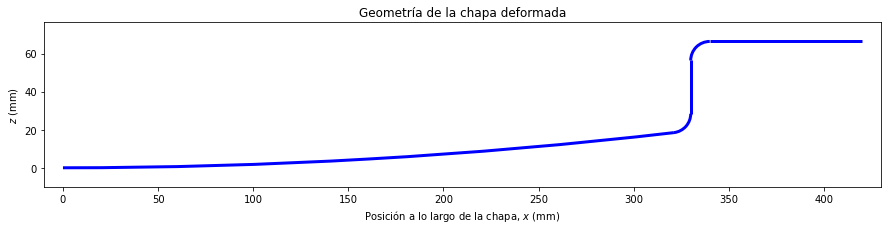

In [37]:
thetaOA = math.asin((a-Rp)/(Rf-Rp))
sOA = Rf*thetaOA
print('Zona OA: Rf = %s mm, theta = %0.3f rad (%0.1f°) --> s = %.0f mm' % (Rf, thetaOA, math.degrees(thetaOA), sOA))
thetaOB = math.pi/2
thetaAB = thetaOB - thetaOA
sAB = Rp*thetaAB
print('Zona AB: Rp = %s mm, theta = %0.3f rad (%0.1f°) --> s = %.0f mm' % (Rp, thetaAB, math.degrees(thetaAB), sAB))
print('Zona BC: s = %s mm' % sBC)
thetaCD = -thetaOB
sCD = -Rd*thetaCD
print('Zona CD: Rd = %s mm, theta = %0.3f rad (%0.1f°) --> s = %.0f mm' % (Rd, thetaCD, math.degrees(thetaCD), sCD))
print('Zona DE: s = %s mm' % sDE)
print('Zona EF: s = %s mm' % sEF)
s_total = sOA+sAB+sBC+sCD+sDE+sEF
print('Longitud total: s = %0.0f mm' % s_total)

import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

punch_c1 = (0, Rf)
punch_c2 = (a-Rp, Rf-(Rf-Rp)*math.cos(thetaOA))
punch_edge = (a, punch_c2[1])
die_edge = (punch_edge[0], punch_edge[1] + sBC)
die_c = (die_edge[0] + Rd, die_edge[1])
die_D = (die_c[0], die_c[1] + Rd)
die_E = (die_D[0] + sDE, die_D[1])
die_F = (die_E[0] + sEF, die_E[1])

fig, ax = plt.subplots(figsize=(15,5))
ax.add_patch(patches.Arc(punch_c1, 2*Rf, 2*Rf, angle = -90,
             theta1=0, theta2=math.degrees(thetaOA), 
             edgecolor='b', lw=3))
ax.add_patch(patches.Arc(punch_c2, 2*Rp, 2*Rp, angle = -90,
             theta1=math.degrees(thetaOA), theta2=90, 
             edgecolor='b', lw=3))
path = Path([punch_edge, die_edge,], [Path.MOVETO, Path.LINETO,])
ax.add_patch(patches.PathPatch(path, edgecolor='b', lw=3))
ax.add_patch(patches.Arc(die_c, 2*Rd, 2*Rd, angle = 90,
             theta1=0, theta2=90, 
             edgecolor='b', lw=3))
path = Path([die_D, die_E, die_F], [Path.MOVETO, Path.LINETO, Path.LINETO])
ax.add_patch(patches.PathPatch(path, edgecolor='b', lw=3))

ax.set_xlim(-10, die_F[0]+10)
ax.set_ylim(-10, die_F[1]+10)
ax.set_aspect("equal")
ax.set_xlabel(r'$x$ (mm)')
ax.set_ylabel(r'$z$ (mm)')
plt.title("Geometría de la chapa deformada")
plt.show()

#### Fuerza a lo largo de la chapa:
$$
\begin{aligned}
T_{1,\text{O}} = & T_{1,\text{O}} \exp (\mu\,\theta_\text{OA}) \\
T_{1,\text{B}} = & T_{1,\text{O}} \exp (\mu\,\theta_\text{OB}) = T_{1,\text{O}} \exp (\mu\,\pi/2) \\
T_{1,\text{C}} = & T_{1,\text{B}} \\
T_{1,\text{C}} = & T_{1,\text{D}} \exp (\mu\,\theta_\text{DC})  \quad\rightarrow\quad
T_{1,\text{D}} = T_{1,\text{C}} \exp (-\mu\,\pi/2) \\
T_{1,\text{E}} = & T_{1,\text{D}} \\
T_{1,\text{F}} = & 0
\end{aligned}
$$

T1A = 471 kN/m
T1B = 545 kN/m
T1C = 545 kN/m
T1D = 466 kN/m
T1E = 466 kN/m
T1F = 0 kN/m


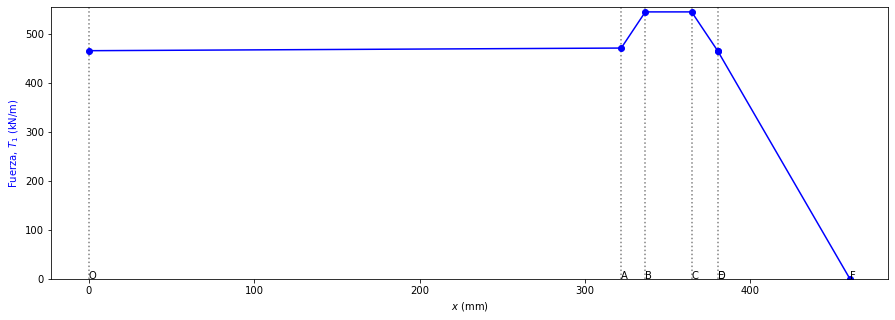

In [38]:
import matplotlib.pyplot as plt

T1A = T1k(T1O, thetaOA)
print('T1A = %.0f kN/m' % T1A)
T1B = T1k(T1O, thetaOB)
print('T1B = %.0f kN/m' % T1B)
T1C = T1B
print('T1C = %.0f kN/m' % T1C)
T1D = T1C*math.exp(mu*thetaCD)
T1D = T1k(T1C, thetaCD)
print('T1D = %.0f kN/m' % T1D)
T1E = T1D
print('T1E = %.0f kN/m' % T1E)
T1F = 0
print('T1F = %.0f kN/m' % T1F)

sO = 0
sA = sO + sOA
sB = sA + sAB
sC = sB + sBC
sD = sC + sCD
sE = sD + sDE
sF = sE + sEF
position = [sO, sA, sB, sC, sD, sE, sF]
tension = [T1O, T1A, T1B, T1C, T1D, T1E, T1F]

fig, ax = plt.subplots(figsize=(15,5))
[ax.axvline(x=i, color='grey', linestyle=':') for i in (sO, sA, sB, sC, sD)]
ax.plot(position, tension, 'bo-')
ax.set_ylim(0, max(tension)+10)
ax.set_xlabel(r'$x$ (mm)')
ax.set_ylabel(r'Fuerza, $T_1$ (kN/m)', color='b')

label = ['O', 'A', 'B', 'C', 'D', 'E', 'F']
[plt.annotate(xy=[i, 0.01], text=j) for i, j in zip(position, label)]
plt.show()

#### Deformación a lo largo de la chapa:
$$
\begin{aligned}
T_{1,\text{A}} = & K (\varepsilon_{1,\text{A}})^n \cdot t_0 \exp{(-\varepsilon_{1,\text{A}})} & \quad\rightarrow\quad \varepsilon_{1,\text{A}} \\
T_{1,\text{B}} = & K (\varepsilon_{1,\text{B}})^n \cdot t_0 \exp{(-\varepsilon_{1,\text{B}})} & \quad\rightarrow\quad \varepsilon_{1,\text{B}} \\
T_{1,\text{C}} = & T_{1,\text{B}} & \quad\rightarrow\quad \varepsilon_{1,\text{C}}=\varepsilon_{1,\text{B}} \\
T_{1,\text{D}} = & K (\varepsilon_{1,\text{D}})^n \cdot t_0 \exp{(-\varepsilon_{1,\text{D}})} & \quad\rightarrow\quad \varepsilon_{1,\text{D}} \\
T_{1,\text{E}} = & T_{1,\text{D}} & \quad\rightarrow\quad \varepsilon_{1,\text{E}}=\varepsilon_{1,\text{D}}
\end{aligned}
$$


In [39]:
from scipy.optimize import fsolve

funcA = lambda x : T1A - T1(x)
funcB = lambda x : T1B - T1(x)
funcD = lambda x : T1D - T1(x)
e1A = fsolve(funcA, e1O)
e1B = fsolve(funcB, e1A)
e1C = e1B
e1D = fsolve(funcD, e1O)
e1E = e1D
e1F = 0
print('e1A = %.3f \t --> Comprobación: T1A = %0.1f kN/m' % (e1A, T1(e1A)))
print('e1B = %.3f \t --> Comprobación: T1B = %0.1f kN/m' % (e1B, T1(e1B)))
print('e1C = %.3f' % e1C)
print('e1D = %.3f \t --> Comprobación: T1D = %0.1f kN/m' % (e1D, T1(e1D)))
print('e1E = %.3f' % e1E)
print('e1F = %.3f' % e1F)

e1A = 0.033 	 --> Comprobación: T1A = 471.2 kN/m
e1B = 0.136 	 --> Comprobación: T1B = 545.0 kN/m
e1C = 0.136
e1D = 0.030 	 --> Comprobación: T1D = 465.8 kN/m
e1E = 0.030
e1F = 0.000


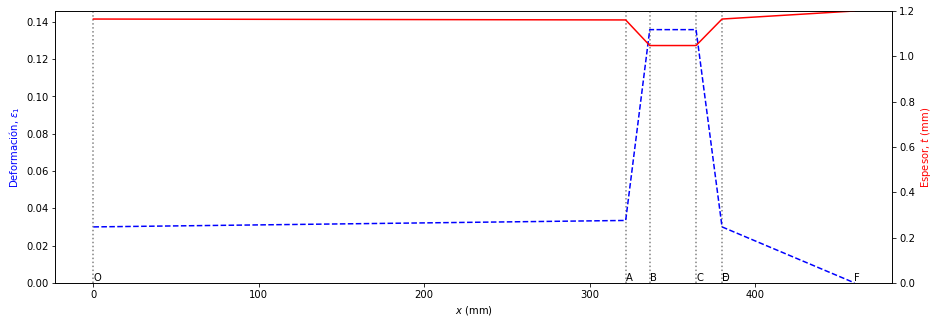

In [42]:
strain = [e1O, e1A, e1B, e1C, e1D, e1E, e1F]
thickness = [t(e) for e in strain]

fig, ax = plt.subplots(figsize=(15,5))
[ax.axvline(x=i, color='grey', linestyle=':') for i in (sO, sA, sB, sC, sD)]
ax.plot(position, strain, 'b--')
ax.set_ylim(0, max(strain)+0.01)
ax.set_xlabel(r'$x$ (mm)')
ax.set_ylabel(r'Deformación, $\varepsilon_1$', color='b')

ax2 = ax.twinx()
ax2.plot(position, thickness, 'r-')
ax2.set_ylim(0, t0)
ax2.set_ylabel(r'Espesor, $t$ (mm)', color='r')

[plt.annotate(xy=[i, 0.01], text=j) for i, j in zip(position, label)]
plt.show()

#### Presión de contacto a lo largo de la chapa

$$
p = \frac{T_1}{R}
$$


- Zona OA:
$
p_\text{O} = \frac{T_{1,\text{O}}}{R_f} \qquad
p_\text{A} = \frac{T_{1,\text{A}}}{R_f}
$

- Zona AB:
$
p_\text{A} = \frac{T_{1,\text{A}}}{R_p} \qquad
p_\text{B} = \frac{T_{1,\text{B}}}{R_p}
$

- Zona BC:
$
p_\text{B} = 0 \qquad
p_\text{C} = 0
$

- Zona CD:
$
p_\text{C} = \frac{T_{1,\text{C}}}{R_d} \qquad
p_\text{D} = \frac{T_{1,\text{D}}}{R_d}
$

- Zona DE:
$
p_\text{D} = 0 \qquad
p_\text{E} = 0
$

- Zona EF:
$
p_\text{E} = \frac{B}{s_\text{EF}} \qquad
p_\text{F} = \frac{B}{s_\text{EF}}
$

- Fuera del prensa-chapa:
$
p_\text{F} = 0
$


Zona OA: pO = 0.166 MPa, pA = 0.168 MPa
Zona BC: pA = 47.1 MPa, pB = 54.5 MPa
Zona CD: pB = pC = 0
Zona DE: pC = 54.5 MPa, pD = 46.6 MPa
Zona EF: pD = pE = 0
Zona F: pE = 29.1 MPa, pF = 29.1 MPa
Fuera del prensa-chapa: pF = 0


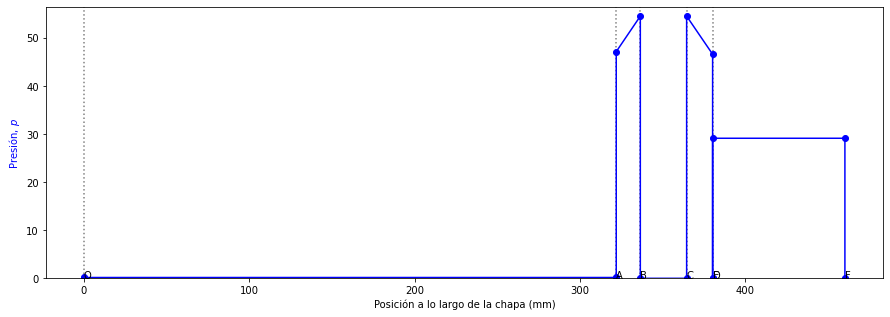

In [44]:
pO = T1O/Rf
pA1 = T1A/Rf
print('Zona OA: pO = %.3f MPa, pA = %.3f MPa' % (pO, pA1))
pA2 = T1A/Rp
pB1 = T1B/Rp
print('Zona BC: pA = %.1f MPa, pB = %.1f MPa' % (pA2, pB1))
pB2 = 0
pC1 = 0
print('Zona CD: pB = pC = 0')
pC2 = T1C/Rp
pD1 = T1D/Rd
print('Zona DE: pC = %.1f MPa, pD = %.1f MPa' % (pC2, pD1))
pD2 = 0
pE1 = 0
print('Zona EF: pD = pE = 0')
pE2 = B/sEF
pF1 = pE2
print('Zona F: pE = %.1f MPa, pF = %.1f MPa' % (pE2, pF1))
pF2 = 0
print('Fuera del prensa-chapa: pF = 0')

position2 = [sO, sA, sA, sB, sB, sC, sC, sD, sD, sE, sE, sF, sF]
pressure = [pO, pA1, pA2, pB1, pB2, pC1, pC2, pD1, pD2, pE1, pE2, pF1, pF2]

fig, ax = plt.subplots(figsize=(15,5))
[ax.axvline(x=i, color='grey', linestyle=':') for i in (sO, sA, sB, sC, sD)]
ax.plot(position2, pressure, 'bo-')
ax.set_ylim(0, max(pressure)+2)
ax.set_xlabel('Posición a lo largo de la chapa (mm)')
ax.set_ylabel(r'Presión, $p$', color='b')

label = ['O', 'A', 'B', 'C', 'D', 'E', 'F']
[plt.annotate(xy=[i, 0.01], text=j) for i, j in zip(position, label)]
plt.show()

#### Longitud inicial de la mitad de la chapa, $w_0$

Por conservación de volumen:
$$
w_0 = \frac{1}{t_0} \sum s_i \, \overline{t_i}
$$

Deformación total promedio:
$$
\overline{\varepsilon_1} = \ln\frac{\sum s_i}{w_0}
$$


In [45]:
tO, tA, tB, tC, tD, tE, tF = thickness
tOA = (tO+tA)/2
wOA = sOA*tOA/t0
print('Zona OA: s = %.1f mm, t = %.3f mm --> longitud inicial = %.1f mm' % (sOA, tOA, wOA))
tAB = (tA+tB)/2
wAB = sAB*tAB/t0
print('Zona AB: s = %.1f mm, t = %.3f mm --> longitud inicial = %.1f mm' % (sAB, tAB, wAB))
tBC = (tB+tC)/2
wBC = sBC*tBC/t0
print('Zona BC: s = %.1f mm, t = %.3f mm --> longitud inicial = %.1f mm' % (sBC, tBC, wBC))
tCD = (tC+tD)/2
wCD = sCD*tCD/t0
print('Zona CD: s = %.1f mm, t = %.3f mm --> longitud inicial = %.1f mm' % (sCD, tCD, wCD))
tDE = (tD+tE)/2
wDE = sDE*tDE/t0
print('Zona DE: s = %.1f mm, t = %.3f mm --> longitud inicial = %.1f mm' % (sDE, tDE, wDE))
tEF = (tE+tF)/2
wEF = sEF*tEF/t0
print('Zona EF: s = %.1f mm, t = %.3f mm --> longitud inicial = %.1f mm' % (sEF, tEF, wEF))
w0 = wOA + wAB + wBC + wCD + wDE + wEF
print('Longitud inicial de la mitad de la chapa, w0 = %.0f mm ' % w0)
e_average = math.log(s_total/w0)
print('Deformación total promedio = %.3f' % e_average)

Zona OA: s = 321.9 mm, t = 1.163 mm --> longitud inicial = 311.8 mm
Zona AB: s = 14.6 mm, t = 1.104 mm --> longitud inicial = 13.4 mm
Zona BC: s = 28.0 mm, t = 1.048 mm --> longitud inicial = 24.4 mm
Zona CD: s = 15.7 mm, t = 1.106 mm --> longitud inicial = 14.5 mm
Zona DE: s = 0.0 mm, t = 1.165 mm --> longitud inicial = 0.0 mm
Zona EF: s = 80.0 mm, t = 1.182 mm --> longitud inicial = 78.8 mm
Longitud inicial de la mitad de la chapa, w0 = 443 mm 
Deformación total promedio = 0.038


#### Fuerza vs deformación en el instante del enunciado

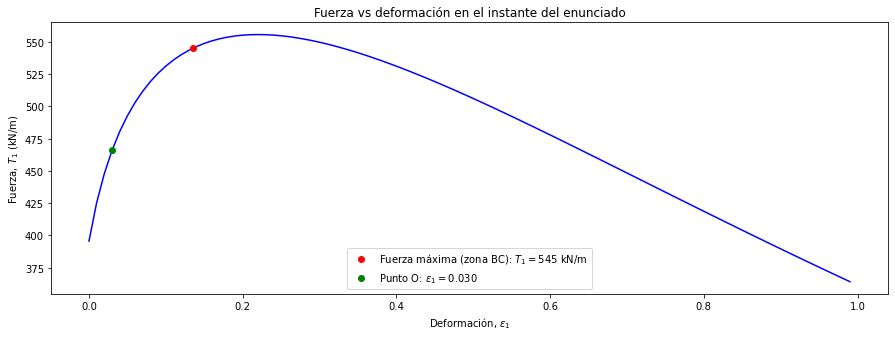

Fuerza máxima en la pared vertical cuando e1 = n = 0.245 --> T1 = 555.4 kN/m
Fuerza máxima, zona BC: e1 = 0.136, T1 = 545.0 kN/m


In [61]:
fig, ax = plt.subplots(figsize=(15,5))
x = [i/100 for i in range(100)]
y = [T1(i) for i in x]
ax.plot(x, y, 'b-')
ax.plot(e1B, T1B, 'ro', label='Fuerza máxima (zona BC): $T_1=%.0f$ kN/m' % T1B)
ax.plot(e1O, T1O, 'go', label=r'Punto O: $\varepsilon_1=%.3f$' % e1O)
ax.set_xlabel(r'Deformación, $\varepsilon_1$')
ax.set_ylabel(r'Fuerza, $T_1$ (kN/m)')
plt.legend(loc='lower center')
plt.title("Fuerza vs deformación en el instante del enunciado")
plt.show()
print('Fuerza máxima en la pared vertical cuando e1 = n = %s --> T1 = %0.1f kN/m' % (n, T1max))
print('Fuerza máxima, zona BC: e1 = %0.3f, T1 = %0.1f kN/m' % (e1B, T1B))

#### Fuerza vs deformación en al inicio de la estricción

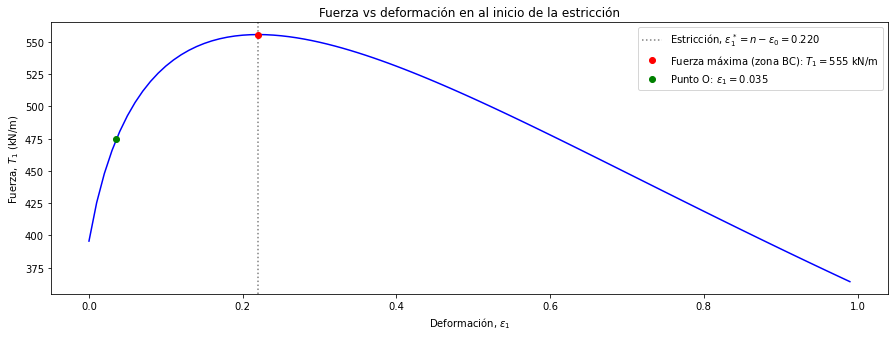

Fuerza máxima en la pared vertical cuando e1 = n = 0.245 --> T1 = 555.4 kN/m
Fuerza máxima, zona BC: e1 = 0.136, T1 = 545.0 kN/m


In [62]:
fig, ax = plt.subplots(figsize=(15,5))
x = [i/100 for i in range(100)]
y = [T1(i) for i in x]
ax.axvline(x=n-e0, color='grey', linestyle=':', label=r'Estricción, $\varepsilon_1^*=n-\varepsilon_0 = %.3f$' % (n-e0))
ax.plot(x, y, 'b-')
ax.plot(n-e0, T1max, 'ro', label='Fuerza máxima (zona BC): $T_1=%.0f$ kN/m' % T1max)
ax.plot(e1Omax, T1Omax, 'go', label=r'Punto O: $\varepsilon_1=%.3f$' % e1Omax)
ax.set_xlabel(r'Deformación, $\varepsilon_1$')
ax.set_ylabel(r'Fuerza, $T_1$ (kN/m)')
plt.legend()
plt.title("Fuerza vs deformación en al inicio de la estricción")
plt.show()
print('Fuerza máxima en la pared vertical cuando e1 = n = %s --> T1 = %0.1f kN/m' % (n, T1max))
print('Fuerza máxima, zona BC: e1 = %0.3f, T1 = %0.1f kN/m' % (e1B, T1B))